In [6]:
import numpy as np
import tensorflow as tf

num_points = 300
vectors_set = []

for i in range(num_points):
    x = np.random.normal(5,5)+15
    y =  x*2+ (np.random.normal(0,3))*2
    vectors_set.append([x,y])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

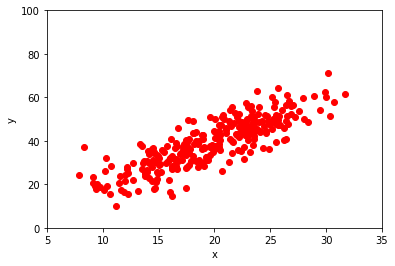

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'ro')
plt.ylim([0,100])
plt.xlim([5,35])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
input_train = tf.estimator.inputs.numpy_input_fn(
   x = {"x":np.array(x_data[:200],dtype=np.float32)},
   y = np.array(y_data[:200],dtype=np.float32),
   num_epochs=100000,
   batch_size=50,
   shuffle=True)

In [20]:
input_eval = tf.estimator.inputs.numpy_input_fn(
   x = {"x":np.array(x_data[200:300],dtype=np.float32)},
   y = np.array(y_data[200:300],dtype=np.float32),
   batch_size=50,
   shuffle=True)

In [53]:
predict_x = np.array([np.random.normal(5,5)+15 for _ in range(100)] ,dtype=np.float32)
input_predict = tf.estimator.inputs.numpy_input_fn(
   x={"x": predict_x},
   num_epochs=1,
   shuffle=False)

In [11]:
feature_columns = [tf.feature_column.numeric_column(key="x"),]

In [12]:
model = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5dz_165d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2df78535c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
STEPS = 1000

model.train(input_fn=input_train, steps=STEPS)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5dz_165d/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3000 into /tmp/tmp5dz_165d/model.ckpt.
INFO:tensorflow:loss = 1594.5286, step = 3000
INFO:tensorflow:global_step/sec: 1211.6
INFO:tensorflow:loss = 2072.0154, step = 3100 (0.083 sec)
INFO:tensorflow:global_step/sec: 1577.87
INFO:tensorflow:loss = 1985.5952, step = 3200 (0.063 sec)
INFO:tensorflow:global_step/sec: 1565.73
INFO:tensorflow:loss = 1580.4038, step = 3300 (0.064 sec)
INFO:tensorflow:global_step/sec: 1564.53
INFO:tensorflow:loss = 1606.6254, step = 3400 (0.064 sec)
INFO:tensorflow:global_step/sec: 1562.57
INFO:tensorflow:loss = 1640.6595, step = 3500 (0.064 sec)
INFO:tensorflow:global_step/sec: 1573.87
INFO:tensorflow:loss = 2464.0

In [33]:
eval_result = model.evaluate(input_fn=input_eval)
average_loss = eval_result["average_loss"]

print("\n" + 80 * "*")
print("\nMSE error for the test set: {:.0f}".format(average_loss))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-04-06:36:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5dz_165d/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-04-06:36:49
INFO:tensorflow:Saving dict for global step 4000: average_loss = 30.270908, global_step = 4000, loss = 1513.5454
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4000: /tmp/tmp5dz_165d/model.ckpt-4000

********************************************************************************

MSE error for the test set: 30


In [54]:
predict_results = model.predict(input_fn=input_predict)

In [55]:
predict_y = [p['predictions'][0] for p in predict_results]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5dz_165d/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


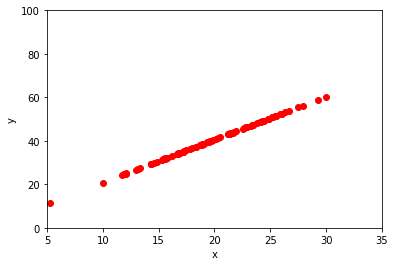

In [56]:
plt.plot(predict_x, predict_y,'ro')
plt.ylim([0,100])
plt.xlim([5,35])
plt.xlabel('x')
plt.ylabel('y')
plt.show()